# What is Simple Linear Regression?
Simple Linear Regression is finding the best relationship between the input variable x (independent variable) and the expected variable y (dependent variable). The linear relationship between these two variables can be represented by a straight line called regression line.

Formula :- $y = b0 + b1x$

What do terms represent?

$y$ is the response or the target variable
$x$ is the feature
$b1$ is the coefficient of x
$b0$ is the intercept
Estimating ("Learning") Model Coefficients
The coefficients are estimated using the least-squares criterion, i.e., the best fit line has to be calculated that minimizes the sum of squared residuals (or "sum of squared errors").

In [1]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'C:\Users\Admin\Desktop\Salary_data.csv')

In [3]:
dataset.head()#print first five row

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
dataset.sample(6)    #print random six row from a dataset

,YearsExperience,Salary
29,10.5,121872
20,6.8,91738
22,7.9,101302
18,5.9,81363
2,1.5,37731
12,4.0,56957


In [5]:
dataset.shape  #shape of dataset

(30, 2)

In [6]:
dataset.info()#full summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
dataset.describe() #statistical information from the dataset

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Here, 'YearsExperience' is the independent variable and 'Salary' is the dependent variable which will be predicted based on the value of 'YearsExperience'.

In [8]:
X = dataset.drop(['Salary'],axis=True)
y = dataset['Salary']

In [9]:
#Now Split The Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24, 1), (6, 1), (24,), (6,))

# Data Visualization

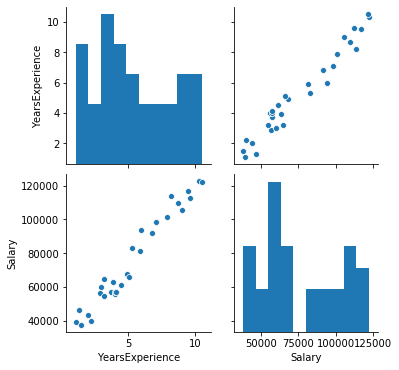

In [11]:
# Visualize Whole Data set
sns.pairplot(dataset)

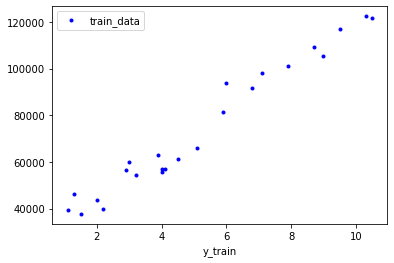

In [16]:
# Visualize Only Train data
plt.plot(X_train,y_train,'b.',label='train_data')
plt.xlabel('X_train')
plt.xlabel('y_train')
plt.legend()
plt.show()

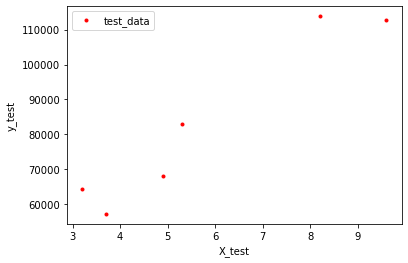

In [15]:
# Visualize Only Test data
plt.plot(X_test,y_test,'r.',label='test_data')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()
plt.show()

# Training Simple Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the Test set results

In [18]:
y_pred = regressor.predict(X_test).round(1)

In [19]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original Salary","Predict Salary"])
calculation

,Original Salary,Predict Salary
0,112635.0,115790.2
1,67938.0,71498.3
2,113812.0,102596.9
3,83088.0,75267.8
4,64445.0,55477.8
5,57189.0,60189.7


In [20]:
print("Training Accuracy :", regressor.score(X_train, y_train))
print("Testing Accuracy :", regressor.score(X_test, y_test))

Training Accuracy : 0.9645401573418146
Testing Accuracy : 0.9024461774180497


# Visualising the Training set results

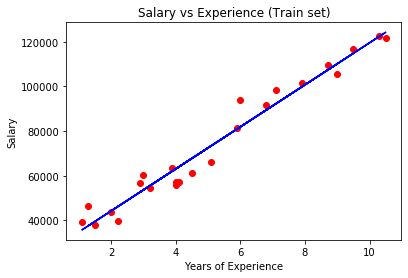

In [21]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Training set results

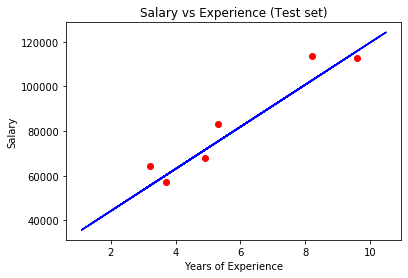

In [22]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# THANK YOU THAT ALL ABOUT LINEAR REGRESSION